In [402]:
import sympy as sy
from numpy import *
from elmecama.celmech import disturbing_function as df
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

sy.init_printing()

lambda_i,a_i,e_i,s_i,omega_i,Omega_i,i_i = sy.symbols('lambda_i,a_i,e_i,s_i,omega_i,Omega_i,i_i')
lambda_j,a_j,e_j,s_j,omega_j,Omega_j,i_j = sy.symbols('lambda_j,a_j,e_j,s_j,omega_j,Omega_j,i_j')

s_i = sy.sin(i_i/2)
s_j = sy.sin(i_j/2)

ModuleNotFoundError: No module named 'elmecama'

In [397]:
def coef_E(j1,j2,j3,j4,j5,j6,nu1,nu2,nu3,nu4):
    m = j1+j3+j5
    if m != 0 and m != 1:
        return 0
    if int((j2+j4+1)/2)-(j2+j4+1)/2 == 0:
        p = int((j2+j4+1)/2)
    else:
        return 0
    if int((j1+j3-1)/2)-(j1+j3-1)/2 == 0:
        p_j = int((j1+j3-1)/2)
    else:
        return 0
    if m == 0:
        k = 1
    else:
        k = 2
    coef_E = -k*math.factorial(1-m)/math.factorial(1+m)*df.KaulaF(1,m,p,nu1)*df.KaulaF(1,m,p_j,nu2)*df.HansenCoefficient_term(1,-j2-j4,-j2,nu3)*df.HansenCoefficient_term(-2,j1+j3,j1,nu4)
    return coef_E

In [398]:
A = df.list_resonance_terms(2,1,0,1)

In [399]:
C = []

for i in range(0, len(A)):
	C.append(coef_E(A[i][0][0],A[i][0][1],A[i][0][2],A[i][0][3],A[i][0][4],A[i][0][5], A[i][1][0],A[i][1][1],A[i][1][2],A[i][1][3]))

In [400]:
R = 0
for i in range(0,len(C)):
    R += (s_j**(abs(A[i][0][4]) + 2*A[i][1][0]) * s_i**(abs(A[i][0][5]) + 2*A[i][1][1]) * e_j**(abs(A[i][0][2]) + 2*A[i][1][2]) * e_i**(abs(A[i][0][3]) + 2*A[i][1][3]))*C[i]*sy.cos(A[i][0][1] * lambda_i + A[i][0][0]*lambda_j+A[i][0][2]*omega_i+ A[i][0][3]*omega_j + A[i][0][4]*Omega_i + A[i][0][5]*Omega_j) 

R

Ahora agrego los términos directos:


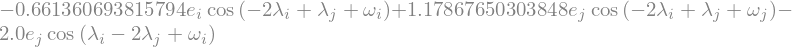

In [401]:
alpha = 0.5
C = []
C_val = []

for i in range(0, len(A)):
	C = df.df_coefficient_Ctilde(A[i][0][0],A[i][0][1],A[i][0][2],A[i][0][3],A[i][0][4],A[i][0][5], A[i][1][0],A[i][1][1],A[i][1][2],A[i][1][3],  include_indirect=False)
	C_val.append(df.evaluate_df_coefficient_dict(C, alpha))

C_val

R2 = 0
for i in range(0,len(C_val)):
    R2 += (s_i**(abs(A[i][0][4]) + 2*A[i][1][0]) * s_j**(abs(A[i][0][5]) + 2*A[i][1][1]) * e_i**(abs(A[i][0][2]) + 2*A[i][1][2]) * e_j**(abs(A[i][0][3]) + 2*A[i][1][3]))*C_val[i]*sy.cos(A[i][0][0]*lambda_i + A[i][0][1]*lambda_j +A[i][0][2]*omega_i+ A[i][0][3]*omega_j + A[i][0][4]*Omega_i + A[i][0][5]*Omega_j) 

R = R2+R

R